In [1]:
# Imalgorithmsport the Library

import pandas as pd# data cleaning library
import numpy as np # array management
import matplotlib.pyplot as plt # visualization
import seaborn as sns #advanced visualization for analytics

In [44]:
#import the data
data= pd.read_csv('googleplaystore.csv')   #### read the csv file 
data.head()   ### show me the first five rows of the data frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# DATA PRE-Processing

# Pandas: Data Cleaning
* Clean Data
* Clean Empty Cells(Null Values)
* Clean Wrong Format(Data Types)
* Clean Wrong Data(Mistakes)
* Remove Duplicate

In [15]:
# print rows and col
data.shape

(10841, 13)

In [16]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
# indentify total null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Clean Empty Cells(Null Values)

In [45]:
data.dropna(inplace=True) ## drop all the rows where there is any null value , inplace = True meanssave this change

In [46]:
data.isnull().sum() # indentify total null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [13]:
size = "16k" ### object or string value

## indexing from right starts with -1 , and from left with 0

float(size[:-1])  # "16"  -- string , 16.0 is a float

16.0

In [47]:
# %% [code]

def change_size(size):
    if 'M' in size:
        x=size[:-1] # 19M
        x=float(x)*1000
        return x
    if 'k' in size: 
        x=size[:-1] #20k
        x=float(x)
        return x
    else:
        return None

In [48]:
data['Size']=data['Size'].apply(change_size)

In [49]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [23]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [50]:
data['Size'].fillna(method='ffill',inplace=True) ## ffill will fill the null values with the last valid value

In [51]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
# Clean Wrong Format(Data Type)
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [52]:
data['Reviews']=data['Reviews'].astype('float')

In [34]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [53]:
data['Installs']=data['Installs'].str.replace('+','')
data['Installs']=data['Installs'].str.replace(',','')

C:\Users\shrey.jain_scienapti\AppData\Local\Temp\ipykernel_23144\1186692117.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs']=data['Installs'].str.replace('+','')


In [35]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [54]:
data['Installs']=data['Installs'].astype('int')

In [37]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [38]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].astype('float')

C:\Users\shrey.jain_scienapti\AppData\Local\Temp\ipykernel_12420\1587797736.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [39]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Wrong Data or Wrong Data Entries

In [55]:
data[data['Rating']>5]

## dataframe['column_name'] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [56]:
data[data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [57]:
data[data['Reviews']>data['Installs']]  ## faulty data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,30000.0,10000,Paid,$2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,$1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.0,10,Free,0,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.0,10,Free,0,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,$0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [58]:
data[data['Reviews']>data['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [59]:
data.drop(data[data['Reviews']>data['Installs']].index, inplace=True) ## drop rows where reviews > installs and save changes

In [60]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [61]:
data.shape

(9353, 13)

In [49]:
data[(data['Type']=='Free')|(data['Price']>0)]  ## no free app should have price > 0

## and & , | or

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Check Outlier

In [ ]:
Checking outliers :
    
Q1, Q3 
IQR = Q3-Q1
High = Q3 + 1.5*IQR
Low = Q1 - 1.5*IQR 

Q1 == 25% 
Q3 == 75%
Q2 == MEDIAN , 50%

value > High or value < Low

In [50]:
data[data['Price']>200].size

195

In [51]:
data[data['Price']>200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [52]:
data.drop(data[data['Price']>200].index,inplace=True)

In [54]:
data.shape

(9338, 13)

In [55]:
data[data['Reviews']>=2000000].shape

(453, 13)

In [56]:
data.drop(data[data['Reviews']>=2000000].index,inplace=True)

In [57]:
data[data['Installs']>100000000].shape

(20, 13)

In [58]:
data['Installs'].quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [59]:
data.drop(data[data['Installs']>100000000].index,inplace=True)

In [60]:
data.shape

(8865, 13)

# Bivariant Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

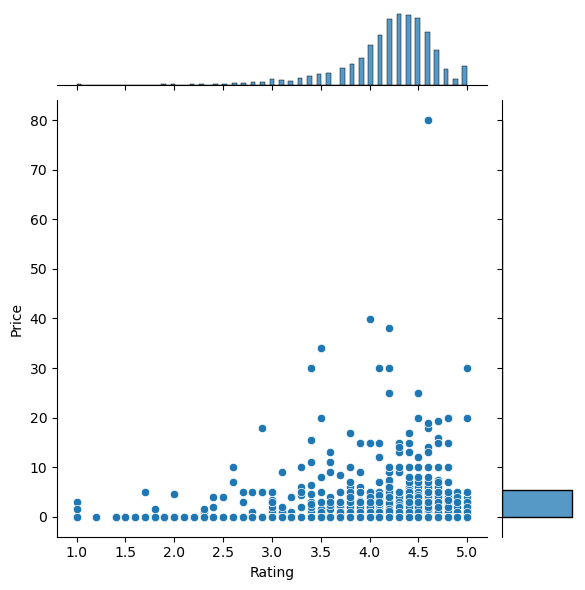

In [61]:
sns.jointplot(x='Rating', y='Price',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

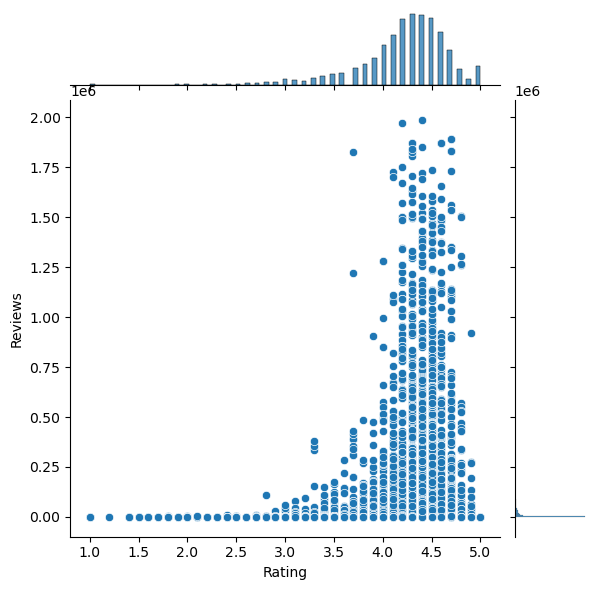

In [62]:
sns.jointplot(x='Rating', y='Reviews',data=data)
plt.show

In [63]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

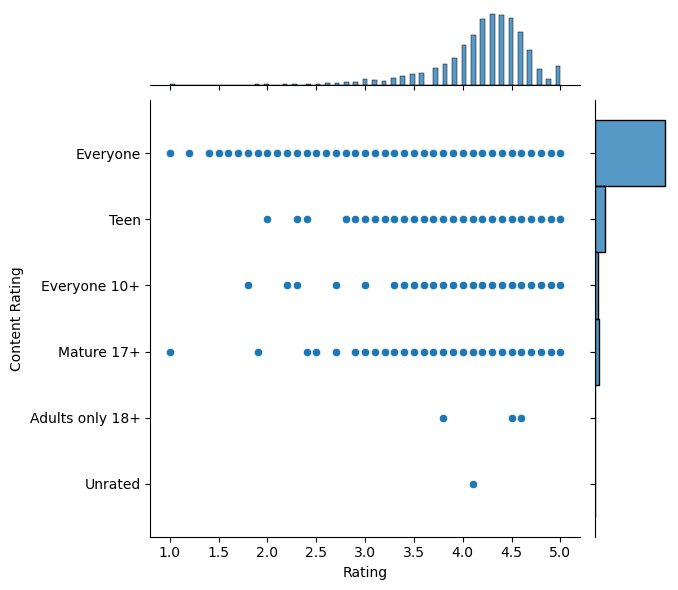

In [64]:
sns.jointplot(x='Rating', y='Content Rating',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

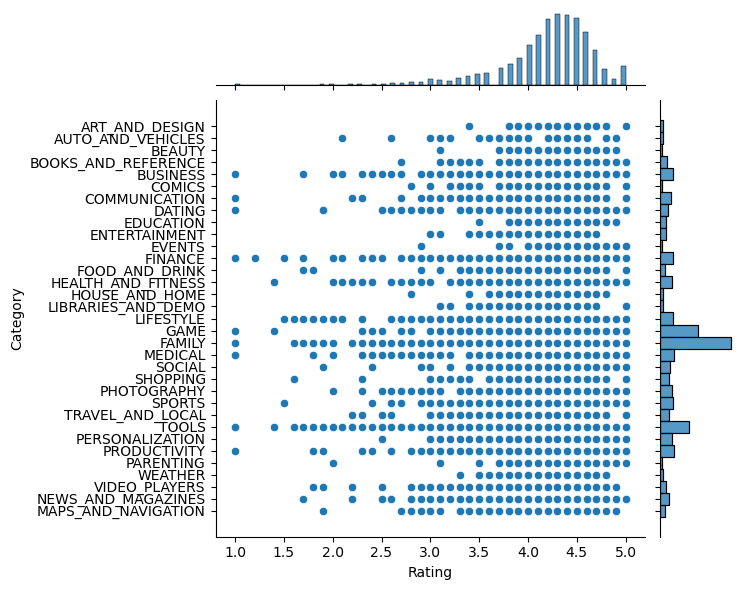

In [65]:
sns.jointplot(x='Rating', y='Category',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

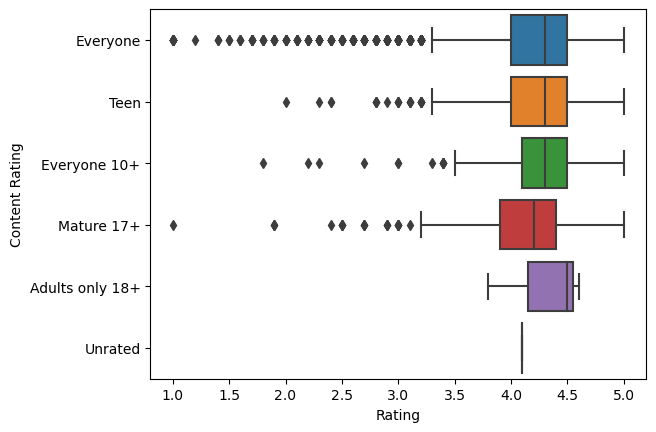

In [66]:
sns.boxplot(x='Rating', y='Content Rating',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

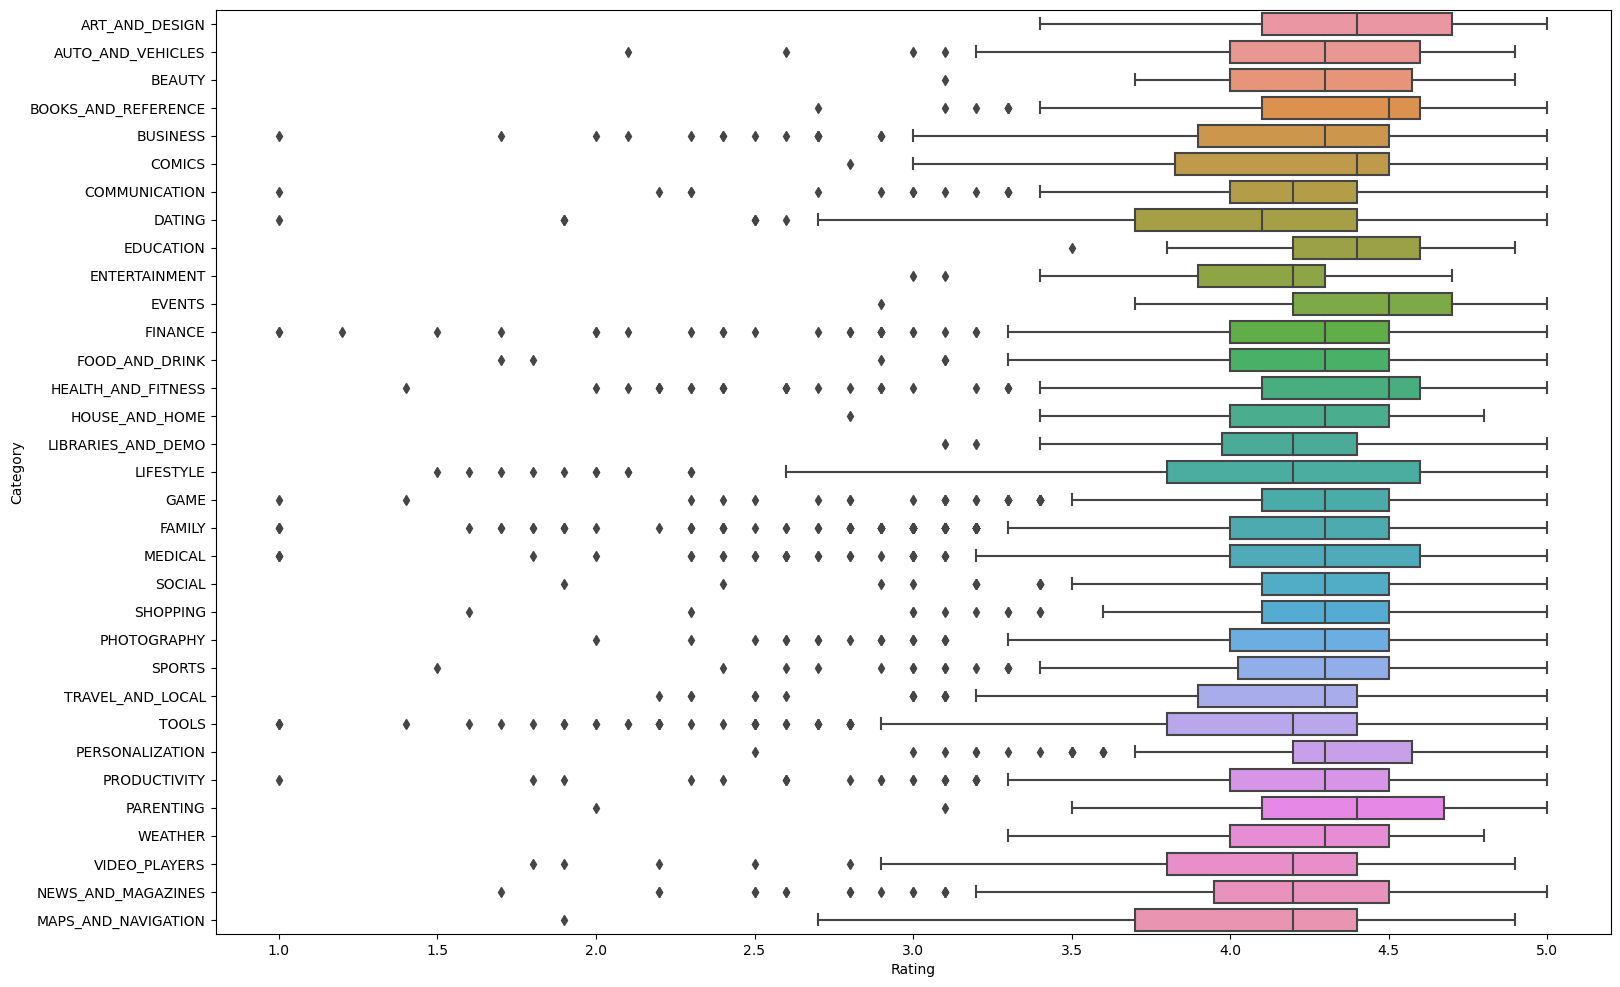

In [67]:
plt.figure(figsize=(18,12))
sns.boxplot(x='Rating', y='Category',data=data)
plt.show

In [68]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
